# Stage 3

<br>

<font color=red>**최종 학습 목표**</font>

* 신용카드 사기거래 탐지 프로젝트를 통해 여러분은 이상치 감지를 훌륭히 수행할 수 있는 데이커가 되는 것에 한 발짝 더 다가가게 될 것입니다.

* 이 뿐만 아니라 이번 교육을 통해 키운 역량은 다른 곳에서도 큰 도움이 될 것이라 기대합니다.<br>

<br><font color=red>**Stage 3 학습 목표**</font>

* 지도 학습과 비지도 학습의 문제 접근 방식을 이해한다.

* 다양한 머신러닝 모델을 이해한다.

* 딥러닝은 무엇인지 이해한다.

* 사용할 수 있는 성능지표를 이해한다.

* 과소 적합과 과대 적합을 이해한다.

* 성능을 개선시킬 수 있는 방안들을 이해한다.<br><br>

# 1. Intro

<br>

**데이커 여러분 환영합니다.** 🤗 

지난 Stage 2에서는 데이터 전처리와 특성 공학에 대해 배워보았습니다.

이번 Stage 3에서는 본격적으로 머신러닝을 활용하여 이상지 감지를 해보겠습니다. 그러기 위해서 전반적으로 모델이 어떻게 학습하는지 배우며 성능이 좋은 모델이란 무엇인지 이해하고자 합니다.

여러분들은 Hint와 함께 퀴즈 및 실습을 통해 차근차근 성장해 나갈 것입니다.

그럼 이제 고고씽 ~ ! 🚅<br><br>

# 2. 프로젝트 배경

<br>

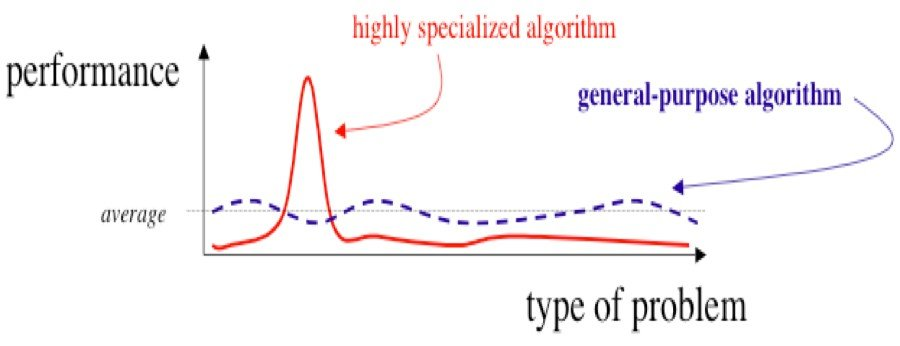

<br>

<font color=red>**머신러닝에서도 공짜 점심은 없다.**</font> (*No Free Lunch Theorems*)<br><br>

  * 금융권에서 통용되는 <font color=darkblue>**"언제나 기회 비용이 발생한다"**</font>라는 뜻의 이 말은 머신러닝 업계에서도 사용되고 있습니다.<br><br>

  * 1996년 David Wolperts와 William Macready 교수는 논문 [⌜No Free Lunch Theorems for Optimization⌟](https://ieeexplore.ieee.org/document/585893)에서 다음과 같이 말하였습니다.<br><br>

  * "We have dubbed the associated results “No Free Lunch” theorems because they demonstrate that if an algorithm perfoms well on a certian class of problems then it necessarily pays for that with degraded performance on the set of all remaining problems." <br><br>

  * 디사 말해, 어떠한 문제 및 데이터에 최적화된 알고리즘이라도 다른 문제나 데이터에는 적합하지 않을 수 있기에 <font color=purple>**새로운 문제를 해결하기 위해서는 다시 비용 (시간과 노력)을 지불하고 다양한 머신러닝 기법을 적용시켜봐야 한다**</font>는 뜻입니다.<br><br>

  * 그렇기에 여러분은 매번 새롭게 등장하는 문제를 해결하기 위해 다양한 머신러닝 엔지니어링 기법을 익혀야 합니다.<br><br>

## 3 - 1 데이터 셋 분할

<br>

**수집된 데이터 셋과 미래에 발생할 데이터 셋**<br><br>

  * 전처리와 특성 공학 과정을 거친 데이터는 모델을 학습시키는 데 사용될 것입니다.<br><br>

  * 그리고 미래에 생성된 데이터 셋은 학습된 모델에 의해 신용카드 거래가 사기 거래 여부를 측정되게 될 것입니다.<br><br>

  * <font color=red>**새롭게 발생한 데이터에 대해 모델이 사기 거래 식별을 사전에 잘 하는 지 알 수 있는 방법은 없을까요?**</font><br><br>

**데이터 셋 분할**<br><br>

  * 학습시키지 않은 데이터에서도 모델이 잘 작동하는 지 알기 위해 **데이터 셋을 분할하는 것**입니다.<br><br>

  * 전처리와 특성 공학 과정을 거친 데이터를 모두 학습시키지 않고 일부는 학습시키지 않는 것입니다.<br><br>

  * 그렇게 우리는 훈련 데이터 셋과 검증 데이터 셋 두 가지 데이터 셋을 사용할 수 있습니다.<br><br>

    - <font color=darkblue>**훈련 데이터 셋**</font> : 모델을 학습시키는 데 사용됩니다.<br><br>

    - <font color=darkblue>**검증 데이터 셋**</font> : 학습된 모델을 성능을 평가하는 데 사용되며, 성능 결과에 따라 모델 학습 이전의 과정을 수정하는 데 참고합니다.<br><br>

**수집된 데이터를 훈련 데이터 셋과 검증 데이터 셋으로 분할하기**

In [3]:
# 데이터 불러오는 방법은 Stage 1 참조

import pandas as pd

val = pd.read_csv('./val.csv')

In [2]:
# 사전에 훈련 데이터 셋과 검증 데이터 셋이 분할되어 있지만 직접 데이터 셋을 분할하여 봅시다.

# sklearn 라이브러리에서 model_selection 중에서 train_test_split를 불러옵니다.
from sklearn.model_selection import train_test_split

In [3]:
# 'val' 데이터 셋을 설명 변수와 목표 변수로 구분합니다.

X = val.drop(columns=['Class'])
y = val[['Class']]

In [4]:
X_train, X_val, y_train, y_val = train_test_split(
                                    X, # 설명 변수
                                    y, # 목표 변수
                                    test_size=0.2, # 전체 데이터 셋 중에서 검증 데이터 셋으로 사용할 비율
                                    stratify=y # 기존 데이터 셋의 Class 비율을 유치 한 채로 데이터 셋을 분할
                                                  )

In [5]:
# 데이터 셋이 잘 분할하였는지 확인
print(X_train.shape) # 훈련 데이터 셋 설명 변수
print(X_val.shape) # 검증 데이터 셋 설명 변수
print(y_train.shape) # 훈련 데이터 셋 목표 변수
print(y_val.shape) # 훈련 데이터 셋 목표 변수

(22769, 31)
(5693, 31)
(22769, 1)
(5693, 1)


In [6]:
# Class 비율이 어느 정도 비슷하다는 것을 확인할 수 있습니다.
print(val['Class'].value_counts())
print(y_train['Class'].value_counts())
print(y_val['Class'].value_counts())

0    28432
1       30
Name: Class, dtype: int64
0    22745
1       24
Name: Class, dtype: int64
0    5687
1       6
Name: Class, dtype: int64


<br>

**대회에서 제공된 데이터 셋**<br><br>

  * 신용카드 사기거래 식별 AI 경진 대회애서는 4가지 데이터 셋을 제공해주어 우리가 데이터 셋을 분할할 필요는 없습니다.<br><br>

    - **train.csv** : 훈련 데이터 셋으로 인사이트를 발견하거나 모델을 학습시키는 데 사용됩니다.<br><br>

    - **val.csv** : 학습된 모델이 학습시키지 않은 데이터 셋에서도 잘 작동하는 지 평가하는 데 사용됩니다.<br><br>

    - **test.csv** : 테스트 데이터 셋으로서 미래에 발생할 데이터 셋이라고 가정하고, 대회 성적을 평가하기 위해 사용됩니다.<br><br>

    - **sample_submission.csv** : 테스트 데이터 셋에 대한 모델의 예측 결과를 최종적으로 출력하는 데이터 셋입니다.<br><br>

## 3 - 2 이상치 감지를 위한 지도 학습 기반 모델

<br>

**Tree Based Model**

<br>

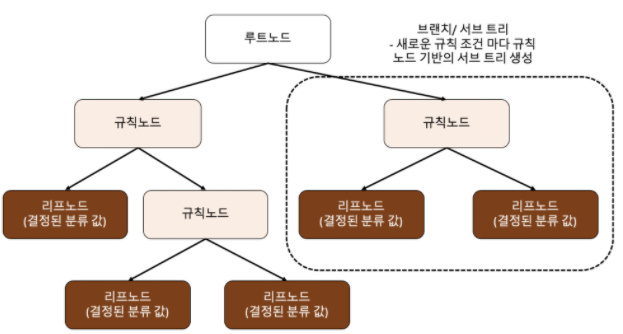

<br>



<br>

**다양한 머신러닝 모델 중에서 트리 기반 모델에 대해 자세히 알아봅시다.**

<br>

<br>

**구조**<br><br>

  * 뿌리부터 시작하여 점차 가지를 뻗어 나가는 나무를 뒤집은 모양입니다.<br><br>

  * <font color=darkblue>**루트 노드**</font> : 트리가 처음으로 시작된 곳입니다.<br><br>

  * <font color=darkblue>**규칙 노드**</font> : 데이터의 특성에 조건을 제시하는 곳입니다.<br><br>

  * <font color=darkblue>**리프 노드**</font> : 규칙 노드에 따라 결정된 샘플 데이터가 있는 곳입니다.<br><br>

  * <font color=darkblue>**서브 트리**</font> : 새로운 규칙 조건마다 생성되는 작은 트리입니다.<br><br>

**작동 방식**<br><br>

  1. 데이터의 특정 특성에 대해 <font color=red>**특정 조건을 제시하여 데이터를 분류**</font>합니다.<br><br>

  2. 분류된 데이터들은 다시 1번 과정을 반복합니다. (트리의 깊이가 깊어져 갑니다.)<br><br>

  3. 분류된 데이터가 <font color=red>**더이상 불순도가 없는 상태**</font> (*더 이상 분류할 수 없는 상태*)가 되었을 때 반복을 멈춥니다.<br><br>

**Ensemble**

<br>

"**나무를 보지말고 숲을 봐라**"라는 말이 있듯이 하나의 트리 기반 모델보다 여러 개의 모델을 사용하면 더 좋을 결과를 얻을 수 있을 것입니다.

여러 모델을 통해 활용하여 최종 결과를 도출하는 것을 <font color=red>**앙상블** (*Ensemble*)</font>이라고 합니다.

<br>

**앙상블 (Ensemble)**<br><br>

  * 앙상블에는 다음의 여러 기법이 존재합니다.<br><br>

  * <font color=darkblue>**Voting**</font> : <font color=#1589FF>**여러 알고리즘 모델이 내놓은 결과를 평균값 계산 혹은 투표**</font>하여 최종 결과를 도출하는 것입니다.<br><br>

  * <font color=darkblue>**Bagging**</font> : <font color=#1589FF>**데이터를 복원 추출**</font>하여 각 표본에 대해 모델을 학습시킨 후, 내놓은 결과를 **평균값 계산 혹은 투표**를 통해 최종 결과값으로 도출하는 것입니다.<br><br>

  * <font color=darkblue>**Boosting**</font> : 하나의 모델이 내놓은 <font color=#1589FF>**결과 중에 틀린 것에 대해 다음의 모델이 집중**</font>하여 성능을 높입니다. 그리고 이전 모델을 이어서 학습한 모델들이 내놓은 결과를 **평균값 계산 혹은 투표**하여 최종 결과를 도출합니다.<br><br>

<br>

### Random Forest

<br>

Random Forest는 **데이터의 특성을 무작위 복원 추출**하여 일부 특성만 사용하는 <font color=red>**Bagging**</font>이라는 기법을 통해 여러 개의 트리 기반 모델을 만듭니다.

그리고 다수의 트리 기반 모델이 **도출한 결과를 평균값으로 계산 혹은 다수결로 투표**하여 최종 결과로 제출합니다.

<br>

In [57]:
# sklearn 라이브러리에서 ensemble 중에서 RandomForestClassifier를 불러옵니다.
from sklearn.ensemble import RandomForestClassifier

# 회귀 문제인 경우
from sklearn.ensemble import RandomForestRegressor

<br>

[Random Foerst의 다양한 하이퍼 파라미터](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

<br>

In [58]:
# 모델을 용이하게 사용하게 별도로 변수로 지정합니다.
model = RandomForestClassifier(
    n_estimators=100, # 몇 개의 트리 기반 모델을 생성할 것인지 결정합니다.
    criterion='gini', # 불순도를 평가하는 방식을 결정합니다.
    min_samples_leaf=2, # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    min_samples_split=10, # 노드를 분할하기 위한 최소한 데이터의 수 입니다.
    
    # None으로 설정 시, 최대치로 설정됩니다.
    max_depth=10, # 트리의 깊이의 최대치를 결정합니다.
    max_features=15, # 무작위로 복원 추출할 특성의 개수를 결정합니다.
    max_leaf_nodes=200 # 리프 노드의 최대 개수를 결정합니다.
)

In [59]:
# 훈련 데이터 셋을 모델에 학습시킵니다.
model.fit(X_train, # 설명 변수
          y_train) # 목표 변수

<ipython-input-59-1c8e42de08ef>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, # 설명 변수


RandomForestClassifier(max_depth=10, max_features=15, max_leaf_nodes=200,
                       min_samples_leaf=2, min_samples_split=10)

In [60]:
# 훈련 데이터 셋과 검증 데이터 셋 정확도를 각각 측정해봅시다.
# sklearn 라이브러리에서 metrics 중에서 accuracy_score를 불러옵니다.
from sklearn.metrics import accuracy_score

<br>

**훈련 데이터 셋 정확도**

<br>

In [61]:
# 훈련 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_train_pred = model.predict(X_train)

# 추론 결과와 정답을 비교해봅시다.
y_train['Predict'] = y_train_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_train.head())

train_valaccuracy = accuracy_score(y_train['Class'], y_train['Predict'])
print(f'\n훈련 데이터 셋 정확도 : {train_valaccuracy}\n')

,Class,Predict
6861,0,0
3134,0,0
17743,0,0
19919,0,0
5965,0,0



훈련 데이터 셋 정확도 : 0.9996486450876191



<br>

**검증 데이터 셋 정확도**

<br>

In [62]:
# 검증 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_val_pred = model.predict(X_val)

# 추론 결과와 정답을 비교해봅시다.
y_val['Predict'] = y_val_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_val.head())

val_valaccuracy = accuracy_score(y_val['Class'], y_val['Predict'])
print(f'\n검증 데이터 셋 정확도 : {val_valaccuracy}\n')

,Class,Predict
20801,0,0
2980,0,0
26171,0,0
13860,0,0
17248,0,0



검증 데이터 셋 정확도 : 0.9994730370630599



<br>

### XGBoost

<br>

XGBoost는 **하나의 모델이 내놓은 결과 중에 틀린 정도를 줄이기 위해 다음의 모델이 집중적으로 개선**해 나가는 <font color=red>**Gradient Boosting**</font>이라는 기법을 사용하여 **병렬적으로 모델**을 학습시킵니다.

Gradient Boosting이란 틀린 정도를 줄이기 위해 모델이 사용한 수학 공식에 <font color=darkblue>**Learing Rate를 변경하면서 학습하는 것**</font>입니다.

Random Forest처럼 하이퍼 파라미터 설정 (*colsample_bytree*)을 통해 Bagging을 수행할 수 있습니다.

<br>

In [94]:
X_train, X_val, y_train, y_val = train_test_split(
                                    X, # 설명 변수
                                    y, # 목표 변수
                                    test_size=0.2, # 전체 데이터 셋 중에서 검증 데이터 셋으로 사용할 비율
                                    stratify=y # 기존 데이터 셋의 Class 비율을 유치 한 채로 데이터 셋을 분할
                                                  )

In [95]:
# xgboost 라이브러리에서 XGBClassifier를 불러옵니다.
from xgboost import XGBClassifier

# 회귀 문제인 경우
from xgboost import XGBRegressor

<br>

[XGBoost의 다양한 하이퍼 파라미터](https://xgboost.readthedocs.io/en/stable/parameter.html)

<br>

In [96]:
# 모델을 용이하게 사용하게 별도로 변수로 지정합니다.
model = XGBClassifier(
    n_estimators=100, # 몇 개의 트리 기반 모델을 생성할 것인지 결정합니다.
    learning_rate=0.01, # learing Rate 값을 설정합니다.
    max_depth=10, # 트리의 깊이의 최대치를 결정합니다.
    min_child_weight=2, # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    gamma=0, #  리프 노드를 추가로 생성할 지 결정하는 최소 손실 감소 값을 결정합니다.
    colsample_bytree=0.5,  # 무작위로 복원 추출할 특성의 비율을 결정합니다.
    sub_sample=1, # 학습 시 사용할 데이터 샘플의 비율을 결정합니다.
    reg_lambda=1, # L2 규제에 적용할 값을 결정합니다.
    reg_alpha=0, # L1 규제에 적용할 값을 결정합니다.
    scale_pos_weight=1, # 데이터가 불균형 할때 사용,
                      )

In [97]:
# 훈련 데이터 셋을 모델에 학습시키고 검증 데이터 셋에 대한 결과를 확인합니다.
model.fit(X_train, # 설명 변수
          y_train, # 목표 변수
          # logloss : 얼마나 높은 확률로 예측해서 정답을 맞추었는가? -> 100% 확률로 맞춘 경우 logloss는 0
          eval_metric='logloss', # 검증 데이터 셋 평가 지표
          eval_set=[(X_val, y_val)], # 검증 데이터 셋
          early_stopping_rounds=10 # 검증 데이터 셋에 다한 평가 지표가 개선되지 않는 최대 반복 횟수를 설정합니다.
          ) 

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-logloss:0.683186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.673442
[2]	validation_0-logloss:0.663918
[3]	validation_0-logloss:0.654606
[4]	validation_0-logloss:0.645393
[5]	validation_0-logloss:0.636387
[6]	validation_0-logloss:0.627564
[7]	validation_0-logloss:0.618955
[8]	validation_0-logloss:0.610441
[9]	validation_0-logloss:0.602037
[10]	validation_0-logloss:0.59391
[11]	validation_0-logloss:0.585859
[12]	validation_0-logloss:0.577906
[13]	validation_0-logloss:0.570198
[14]	validation_0-logloss:0.562494
[15]	validation_0-logloss:0.554997
[16]	validation_0-logloss:0.547669
[17]	validation_0-logloss:0.540464
[18]	validation_0-logloss:0.533311
[19]	validation_0-logloss:0.526387
[20]	validation_0-logloss:0.519505
[21]	validation_0-logloss:0.512739
[22]	validation_0-logloss:0.506097
[23]	validation_0-logloss:0.499574
[24]	validation_0-logloss:0.493099
[25]	validation_0-logloss:0.486764
[26]	validation_0-logloss:0.48057

XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, max_depth=10,
              min_child_weight=2, sub_sample=1)

In [98]:
# 훈련 데이터 셋과 검증 데이터 셋 정확도를 각각 측정해봅시다.
# sklearn 라이브러리에서 metrics 중에서 accuracy_score를 불러옵니다.
from sklearn.metrics import accuracy_score

<br>

**훈련 데이터 셋 정확도**

<br>

In [99]:
# 훈련 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_train_pred = model.predict(X_train)

# 추론 결과와 정답을 비교해봅시다.
y_train['Predict'] = y_train_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_train.head())

train_valaccuracy = accuracy_score(y_train['Class'], y_train['Predict'])
print(f'\n훈련 데이터 셋 정확도 : {train_valaccuracy}\n')

,Class,Predict
3948,0,0
5371,0,0
20601,0,0
17090,0,0
24978,0,0



훈련 데이터 셋 정확도 : 0.9996925644516668



<br>

**검증 데이터 셋 정확도**

<br>

In [100]:
# 검증 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_val_pred = model.predict(X_val)

# 추론 결과와 정답을 비교해봅시다.
y_val['Predict'] = y_val_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_val.head())

val_valaccuracy = accuracy_score(y_val['Class'], y_val['Predict'])
print(f'\n검증 데이터 셋 정확도 : {val_valaccuracy}\n')

,Class,Predict
15688,0,0
25213,0,0
9543,0,0
5750,0,0
27809,0,0



검증 데이터 셋 정확도 : 0.9996486913753733



<br>

### LGBM

<br>

LGBM은 XGBoost와 마찬가지로 <font color=red>**Gradient Boosting을 활용**</font>하여 모델을 학습시킵니다.

차이점으로는 **XGBoost는 level-wise 트리 확장 구조**인 반면에 <font color=darkblue>**LGBM은 leaf-wise 트리 확장 구조**</font> 입니다.<br><br>

  * <font color=#1589FF>**level-wise 트리 확장 구조**</font><br><br>

      - 모델을 학습시키면서 트리를 **수평적**으로 키웁니다.<br><br>
      - 트리를 균형적으로 맞추기 위해 추가 연산이 필요하여 상대적으로 속도가 느립니다.<br><br>

  * <font color=#1589FF>**leaf-wise 트리 확장 구조**</font><br><br>

      - 모델을 학습시키면서 트리를 **수직적**으로 키웁니다.<br><br>
      - loss node를 선택해 loss를 줄여가기에 상대적으로 속도가 빠릅니다.<br><br>

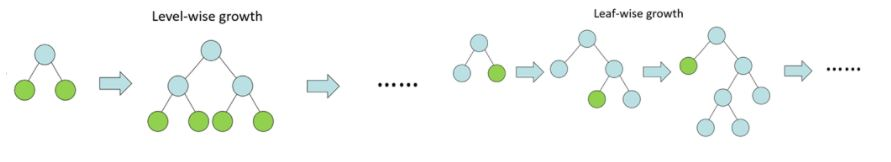

<br>

In [86]:
X_train, X_val, y_train, y_val = train_test_split(
                                    X, # 설명 변수
                                    y, # 목표 변수
                                    test_size=0.2, # 전체 데이터 셋 중에서 검증 데이터 셋으로 사용할 비율
                                    stratify=y # 기존 데이터 셋의 Class 비율을 유치 한 채로 데이터 셋을 분할
                                                  )

In [88]:
# lightgbm 라이브러리에서 LGBMClassifier를 불러옵니다.
from lightgbm import LGBMClassifier

# 회귀 문제인 경우
from lightgbm import LGBMRegressor

<br>

[LGBMClassifier의 다양한 하이퍼 파라미터](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

<br>

In [89]:
# 모델을 용이하게 사용하게 별도로 변수로 지정합니다.
model = LGBMClassifier(
    n_estimators=100, # 몇 개의 트리 기반 모델을 생성할 것인지 결정합니다.
    learning_rate=0.01, # learing Rate 값을 설정합니다.
    max_depth=10, # 트리의 깊이의 최대치를 결정합니다.
    num_leaves=100, # 하나의 트리가 가질 수 있는 최대 리프 노드 개수
    min_child_weight=1e-3, # 리프 노드가 되기 위한 최소한의 샘플 데이터 비율
    colsample_bytree=0.5,  # 무작위로 복원 추출할 특성의 비율을 결정합니다.
    subsample=1, # 학습 시 사용할 데이터 샘플의 비율을 결정합니다.
    reg_lambda=1, # L2 규제에 적용할 값을 결정합니다.
    reg_alpha=0, # L1 규제에 적용할 값을 결정합니다.
    class_weight='balanced', # 데이터가 불균형 할때 사용,
                      )

In [90]:
# 훈련 데이터 셋을 모델에 학습시키고 검증 데이터 셋에 대한 결과를 확인합니다.
model.fit(X_train, # 설명 변수
          y_train, # 목표 변수
          eval_metric='binary_logloss', # 검증 데이터 셋 평가 지표
          eval_set=[(X_val, y_val)], # 검증 데이터 셋
          early_stopping_rounds=10 # 검증 데이터 셋에 다한 평가 지표가 개선되지 않는 최대 반복 횟수를 설정합니다.
          ) 

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.683274	valid_0's binary_logloss: 0.683274
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.673589	valid_0's binary_logloss: 0.673589
[3]	valid_0's binary_logloss: 0.66413	valid_0's binary_logloss: 0.66413
[4]	valid_0's binary_logloss: 0.65486	valid_0's binary_logloss: 0.65486
[5]	valid_0's binary_logloss: 0.64575	valid_0's binary_logloss: 0.64575
[6]	valid_0's binary_logloss: 0.636819	valid_0's binary_logloss: 0.636819
[7]	valid_0's binary_logloss: 0.628028	valid_0's binary_logloss: 0.628028
[8]	valid_0's binary_logloss: 0.619435	valid_0's binary_logloss: 0.619435
[9]	valid_0's binary_logloss: 0.611005	valid_0's binary_logloss: 0.611005
[10]	valid_0's binary_logloss: 0.602712	valid_0's binary_logloss: 0.602712
[11]	valid_0's binary_logloss: 0.594567	valid_0's binary_logloss: 0.594567
[12]	valid_0's binary_logloss: 0.586549	valid_0's binary_logloss: 0.586549
[13]	valid_0's binary_logloss: 0.578719	valid_0's bin

LGBMClassifier(class_weight='balanced', colsample_bytree=0.5,
               learning_rate=0.01, max_depth=10, num_leaves=100, reg_alpha=0,
               reg_lambda=1, subsample=1)

In [91]:
# 훈련 데이터 셋과 검증 데이터 셋 정확도를 각각 측정해봅시다.
# sklearn 라이브러리에서 metrics 중에서 accuracy_score를 불러옵니다.
from sklearn.metrics import accuracy_score

<br>

**훈련 데이터 셋 정확도**

<br>

In [92]:
# 훈련 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_train_pred = model.predict(X_train)

# 추론 결과와 정답을 비교해봅시다.
y_train['Predict'] = y_train_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_train.head())

train_valaccuracy = accuracy_score(y_train['Class'], y_train['Predict'])
print(f'\n훈련 데이터 셋 정확도 : {train_valaccuracy}\n')

,Class,Predict
24547,0,0
6756,0,0
18011,0,0
5592,0,0
2712,0,0



훈련 데이터 셋 정확도 : 0.9998682419078572



<br>

**검증 데이터 셋 정확도**

<br>

In [93]:
# 검증 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_val_pred = model.predict(X_val)

# 추론 결과와 정답을 비교해봅시다.
y_val['Predict'] = y_val_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_val.head())

val_valaccuracy = accuracy_score(y_val['Class'], y_val['Predict'])
print(f'\n검증 데이터 셋 정확도 : {val_valaccuracy}\n')

,Class,Predict
824,0,0
27261,0,0
7272,0,0
12665,0,0
12511,0,0



검증 데이터 셋 정확도 : 0.9998243456876866



<br>

## 3 - 3 이상치 감지를 위한 비지도 학습 기반 모델

<br>

**비지도 학습 기반 이상치 감지**<br><br>

모델에게 직접 무엇이 정상이고 비정상 데이터인지 알려준다면 쉽게 이상치 감지를 수행할지도 모릅니다.<br><br>

<font color=red>**그렇다면 왜 비지도 학습으로 이상치 감지를 수행하는 것일까요?**</font><br><br>

  * 신용카드 사기거래는 사기거래 예방법과 분별법이 발전할수록 같이 정교해지고 교묘해지고 있습니다. 그리고 <font color=#1589FF>**새로운 형태의 사기거래가 계속적으로 발생**</font>하고 있습니다.<br><br>

  * 즉, 특정 형태의 패턴만 비정상으로 판별하는 지도 학습의 문제를 해결하고자 <font color=#1589FF>**미래에 다양한 패턴의 비정상 거래로 구분**</font>할 수 있도록 비지도 학습을 수행하는 것입니다.<br><br>

  * 결론적으로 <font color=#1589FF>**정상 거래 데이터에서는 볼 수 없는 새로운 패턴의 비정상 거래 데이터를 식별**</font>하기 위해 비지도 학습 기반의 모델을 만드는 것입니다.<br><br>

<br>

### Isolate Forest

<br>

위에서 트리 기반의 모델은 다양한 데이터의 특성을 기준으로 데이터 분류하여 모델을 학습시킨다고 배웠습니다.

이를 응용하여 Isolate Forest는 <font color=red>**비정상 데이터는 정상 데이터와 다른 데이터의 패턴을 보여줄 것이라고 가정**</font>합니다.

 그리고 <font color=darkblue>**트리 기반 모델의 상층부에 모여있는 데이터는 다른 데이터와 달리 쉽게 구분되는 비정상 데이터라고 간주**</font>하는 것입니다.

<br>

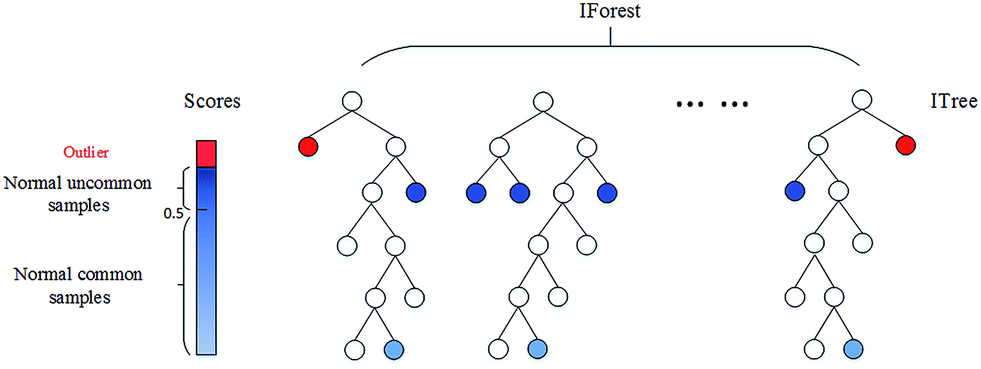

<br>

In [41]:
X_train, X_val, y_train, y_val = train_test_split(
                                    X, # 설명 변수
                                    y, # 목표 변수
                                    test_size=0.2, # 전체 데이터 셋 중에서 검증 데이터 셋으로 사용할 비율
                                    stratify=y # 기존 데이터 셋의 Class 비율을 유치 한 채로 데이터 셋을 분할
                                                  )

In [43]:
# sklearn 라이브러리에서 ensemble 중에서 IsolationForest를 불러옵니다.
from sklearn.ensemble import IsolationForest

<br>

[Isolate Forest의 다양한 하이퍼 파라미터](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

<br>

In [49]:
# 모델을 용이하게 사용하게 별도로 변수로 지정합니다.
model = IsolationForest(
    n_estimators=100, # 몇 개의 트리 기반 모델을 생성할 것인지 결정합니다.
    max_features=15, # 무작위로 복원 추출할 특성의 개수를 결정합니다.
    max_samples='auto', # 무작위로 복원 추출할 데이터의 개수를 결정합니다.
    contamination=24/22745, # 데이터 셋에 몇 개의 이상치가 존재하는 비율을 설정합니다.
)

In [55]:
# 데이터 셋에 이상치가 있는 비율
y_train['Class'].value_counts()

0    22745
1       24
Name: Class, dtype: int64

In [50]:
# 훈련 데이터 셋을 모델에 학습시킵니다.
model.fit(X_train) # 설명 변수

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0010551769619696638, max_features=15)

In [51]:
# 훈련 데이터 셋과 검증 데이터 셋 정확도를 각각 측정해봅시다.
# sklearn 라이브러리에서 metrics 중에서 accuracy_score를 불러옵니다.
from sklearn.metrics import accuracy_score

In [52]:
# 모델의 출력값을 변경합니다.

import numpy as np

def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량) 이므로 (0:정상, 1:불량)로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

<br>

**훈련 데이터 셋 정확도**

<br>

In [53]:
# 훈련 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_train_pred = model.predict(X_train)
y_train_pred = get_pred_label(y_train_pred)

# 추론 결과와 정답을 비교해봅시다.
y_train['Predict'] = y_train_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_train.head())

train_valaccuracy = accuracy_score(y_train['Class'], y_train['Predict'])
print(f'\n훈련 데이터 셋 정확도 : {train_valaccuracy}\n')

,Class,Predict
21964,0,0
3058,0,0
20033,0,0
11668,0,0
21884,0,0



훈련 데이터 셋 정확도 : 0.9985506609864289



<br>

**검증 데이터 셋 정확도**

<br>

In [54]:
# 검증 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_val_pred = model.predict(X_val)
y_val_pred = get_pred_label(y_val_pred)

# 추론 결과와 정답을 비교해봅시다.
y_val['Predict'] = y_val_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_val.head())

val_valaccuracy = accuracy_score(y_val['Class'], y_val['Predict'])
print(f'\n검증 데이터 셋 정확도 : {val_valaccuracy}\n')

,Class,Predict
14101,0,0
24635,0,0
17941,0,0
9703,0,0
6051,0,0



검증 데이터 셋 정확도 : 0.9989460741261198



<br>

**트리 기반의 모델 외에 다양한 머신러닝 및 딥러닝을 활용한 이상치 감지 방법** 

<br>

<br>

### LOF

<br>

LOF (Local Outiler Factor)는 <font color=red>**상대적인 밀도**</font>에 따라 이상치를 감지합니다.

Stage 2의 클러스터링을 떠올려 보면 **비슷한 데이터끼리 군집**을 형성할 수 있다는 것을 이해할 수 있을 것입니다. 그리고 <font color=#1589FF>**비정상 데이터는 정상 데이터로부터 동 떨어져 있을 것**</font>이라고 생각할 수 있습니다. 

그러나 모든 정상 데이터가 한 곳에만 모여있지는 않을 수 있습니다. 그래서 <font color=darkblue>**여러 군집으로부터 상대적으로 얼마나 떨어져 있는 지 계산하는 것**</font>입니다.

<br>

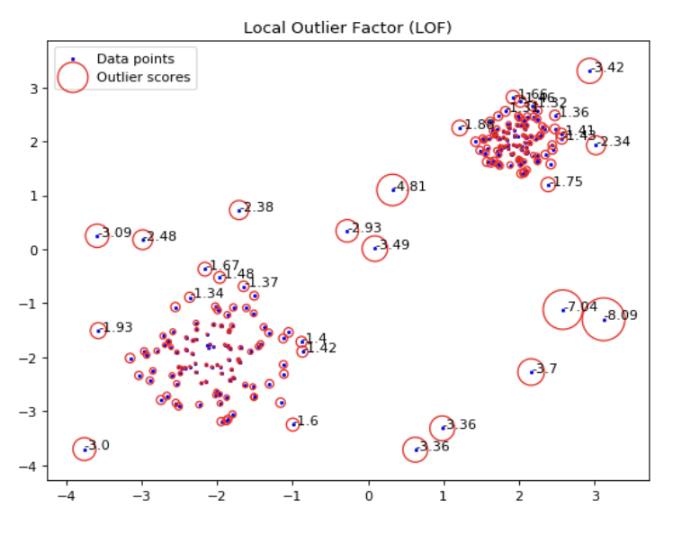


<br>

In [56]:
X_train, X_val, y_train, y_val = train_test_split(
                                    X, # 설명 변수
                                    y, # 목표 변수
                                    test_size=0.2, # 전체 데이터 셋 중에서 검증 데이터 셋으로 사용할 비율
                                    stratify=y # 기존 데이터 셋의 Class 비율을 유치 한 채로 데이터 셋을 분할
                                                  )

In [57]:
# sklearn 라이브러리에서 neighbors 중에서 LocalOutlierFactor를 불러옵니다.
from sklearn.neighbors import LocalOutlierFactor

<br>

[LOF의 다양한 하이퍼 파라미터](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)

<br>

In [64]:
# 모델을 용이하게 사용하게 별도로 변수로 지정합니다.
model = LocalOutlierFactor(
    n_neighbors=20, # 한 데이터로부터 주변의 몇 개의 데이터를 고려할 것인지 결정합니다.
    metric='minkowski', # 데이터 간 거리를 게산 방법을 설정합니다.  
    p=2, # 1 : 맨하탄 거리 / 2 : 유클리드 거리
    contamination=24/22745, # 데이터 셋에 몇 개의 이상치가 존재하는 비율을 설정합니다.
    novelty=True # 아상치 감지 여부를 설정합니다.
)

In [65]:
# 데이터 셋에 이상치가 있는 비율
y_train['Class'].value_counts()

0    22745
1       24
Name: Class, dtype: int64

In [66]:
# 훈련 데이터 셋을 모델에 학습시킵니다.
model.fit(X_train) # 설명 변수

LocalOutlierFactor(contamination=0.0010551769619696638, novelty=True)

In [67]:
# 훈련 데이터 셋과 검증 데이터 셋 정확도를 각각 측정해봅시다.
# sklearn 라이브러리에서 metrics 중에서 accuracy_score를 불러옵니다.
from sklearn.metrics import accuracy_score

In [68]:
# 모델의 출력값을 변경합니다.

import numpy as np

def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량) 이므로 (0:정상, 1:불량)로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

<br>

**훈련 데이터 셋 정확도**

<br>

In [69]:
# 훈련 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_train_pred = model.predict(X_train)
y_train_pred = get_pred_label(y_train_pred)

# 추론 결과와 정답을 비교해봅시다.
y_train['Predict'] = y_train_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_train.head())

train_valaccuracy = accuracy_score(y_train['Class'], y_train['Predict'])
print(f'\n훈련 데이터 셋 정확도 : {train_valaccuracy}\n')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


,Class,Predict
24012,0,0
7625,0,0
15041,0,0
16749,0,0
5910,0,0



훈련 데이터 셋 정확도 : 0.998199306074048



<br>

**검증 데이터 셋 정확도**

<br>

In [70]:
# 검증 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_val_pred = model.predict(X_val)
y_val_pred = get_pred_label(y_val_pred)

# 추론 결과와 정답을 비교해봅시다.
y_val['Predict'] = y_val_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_val.head())

val_valaccuracy = accuracy_score(y_val['Class'], y_val['Predict'])
print(f'\n검증 데이터 셋 정확도 : {val_valaccuracy}\n')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


,Class,Predict
8650,0,0
19895,0,0
16116,0,0
20711,0,0
4813,0,0



검증 데이터 셋 정확도 : 0.9973651853152995



### Auto Encoder

<br>

Auto Encoder는 딥러닝을 활용한 모델의 일종이며 <font color=#1589FF>**입력층과 출력층의 노드 수가 동일**</font>하고 Encoder와 Decoder라고 불리는 부분은 <font color=#1589FF>**Bottleneck에 가까워질수록 노드 수가 줄어드는 특징**</font>이 있습니다.

<font color=darkblue>**정상 데이터끼리는 서로 비슷한 패턴을 보여 출력층에서 입력층과 유사한 데이터를 쉽게 복원**</font>할 수 있을 것입니다. 그러나 <font color=red>**비정상 데이터는 정상 데이터와 다른 패턴을 보이기에 정상 데이터와 유사한 데이터를 쉽게 복원할 수 없을 것**</font>입니다.

이러한 점을 이용하여 Input Data와 Out Data간의 차이를 고려하여 이상치 감지를 수행합니다.

<br>

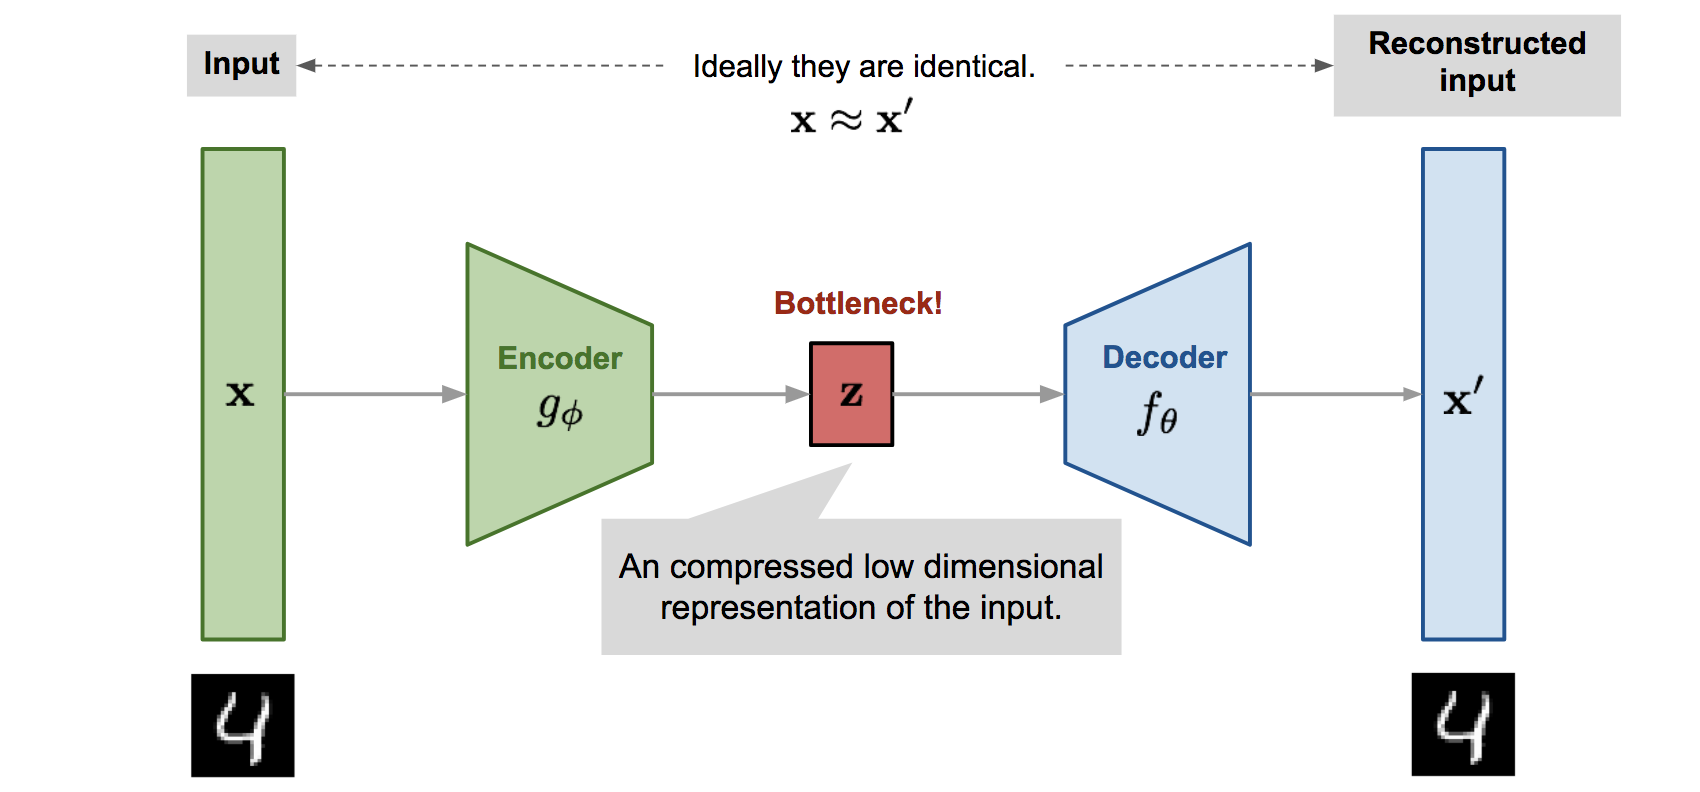

<br>

<br>

## 3 - 4 성능 지표 

<br>

### 혼동 행렬

<br>

<font color=red>**혼동 행렬** (*Confusion Matrix*)</font><br><br>

  * 모델의 성능을 측정하는 지표 중 하나입니다.<br><br>

  * 실제 데이터의 Class와 모델이 예측한 Class를 비교하여 정확도, 정밀도, 재현도를 계산할 수 있습니다.<br><br>

**혼동 행렬을 사용하는 이유**<br><br>

  * 여러분은 **정확도** (*Accuracy*) 개념은 익숙해도 **재현도** (*Recall*), **정밀도** (*Precision*) 그리고 **특이도** (*Specificity*)라는 개념은 익숙하지 않을 것입니다.<br><br>

  * 모델의 성능을 측정하는데 정학도로는 부족하는 이유는 <font color=red>**불균형 데이터 문제**</font> 때문입니다.<br><br>

  * 사기 거래 데이터의 수가 정상 거래 데이터의 수보다 현저히 적다는 것을 여러차례 강조하였습니다. 예를 들어 <font color=darkblue>**정상 거래가 99개 사기 거래 1개인 테스트 데이터**</font>가 있다고 가정하여 봅시다. 특정 한 모델이 잘못되어 <font color=green>**어떤 데이터라도 정상 거래라고 감지하여도 정확도는 0.99가 나옵니다.**</font><br><br>

  * 이를 개선하고자 '재현도, 정밀도 그리고 특이도'라는 개념을 추가로 도입하는 것입니다.<br><br>

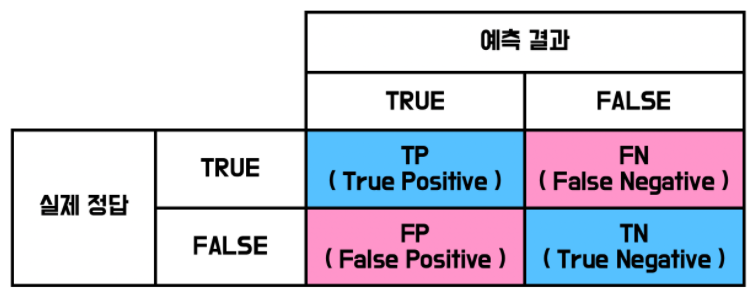

<br>

**예를 들어 혼동행렬을 설명해보자**<br><br>

  * <font color=darkblue>**TP**</font> : **사기거래라고 예측**한 데이터가 **실제로 사기거래**인 경우<br><br>

  * <font color=darkblue>**TN**</font> : **사기거래가 아니라고 예측**한 데이터가 **실제로 정상거래** 경우<br><br>

  * <font color=darkblue>**FP**</font> : **사기거래라고 예측**한 데이터가 **실제로는 사기거래**인 경우<br><br>

  * <font color=darkblue>**FN**</font> : **사기거래가 아니라고 예측**한 데이터가 **실제로 정상거래**인 경우<br><br>

<br>

<font color=red>**정확도** (*Accuracy*)</font>

<br>

* 모델이 **입력된 데이터에 대해 얼마나 정확하게 예측**하였는지 평가하는 지표<br><br>

* <font color=darkblue>**예측 결과와 실제값이 동일한 건 수** / **전체 데이터 수**</font><br><br>

* **(TP + TN) / (TP + TN + FN + FP)**<br><br>

<br>

<font color=red>**정밀도** (*Precision*)</font>

<br>

* 모델이 **예측한 데이터에 대해 얼마나 정확하게 예측**하였는지 평가하는 지표<br><br>

* <font color=darkblue>**사기거래라고 예측한 결과와 실제값이 동일한 건 수** / **사기거래라고 예측한 건 수**</font><br><br>

* **(TP) / (TP + FP)**<br><br>

<br>

<font color=red>**재현도** (*Recall*)</font>

<br>

* **민감도** (*Sensitivity*) 혹은 **TPR** (*True Positive Rate*)라고도 불림<br><br>

* 모델이 **실제로 사기거래인 데이터에 대해 얼마나 정확하게 예측**하였는지 평가하는 지표<br><br>

* <font color=darkblue>**사기거래라고 예측한 결과와 실제값이 동일한 건 수** / **실제로 사기거래인 건 수**</font><br><br>

* **(TP) / (TP + FN)**<br><br>

<br>

<font color=red>**F - 1 Score**</font>

<br>


* **정밀도와 재현율을 종합적으로 고려**한 정량적 수치<br><br>

* <font color=darkblue>**2 * (Precision * Recall) / (Precision + Recall)**</font><br><br>

<br>

<font color=red>**특이도** (*Specificity*)</font>

<br>

  * 모델이 **실제로 정상거래인 데이터에 대해 얼마나 정확하게 예측**하였는지 평가하는 지표<br><br>

  * <font color=darkblue>**정상거래라고 예측한 결과와 실제값이 동일한 건 수** / **실제로 정상거래인 건 수**</font><br><br>

  * **(TN) / (TN + FP)**<br><br>

### Quiz 1

  * Random Forest를 활용하여 혼동행렬를 통해 구할 수 있는 4가지 지표를 계산해보세요.



**Hint**

```
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import f1_score # F1-Score

```

In [72]:
# 실습

val = pd.read_csv('./val.csv')

from sklearn.model_selection import train_test_split

X = val.drop(columns=['Class'])
y = val[['Class']]

X_train, X_val, y_train, y_val = train_test_split(
                                    X, # 설명 변수
                                    y, # 목표 변수
                                    test_size=0.2, # 전체 데이터 셋 중에서 검증 데이터 셋으로 사용할 비율
                                    stratify=y # 기존 데이터 셋의 Class 비율을 유치 한 채로 데이터 셋을 분할
                                                  )


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import f1_score # F1-Score

**Solution**

**모델의 하이퍼 파라미터를 자유롭게 변경해보세요.**

```
model = RandomForestClassifier(
    n_estimators=100, # 몇 개의 트리 기반 모델을 생성할 것인지 결정합니다.
    criterion='gini', # 불순도를 평가하는 방식을 결정합니다.
    min_samples_leaf=2, # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    min_samples_split=10, # 노드를 분할하기 위한 최소한 데이터의 수 입니다.
    
    # None으로 설정 시, 최대치로 설정됩니다.
    max_depth=10, # 트리의 깊이의 최대치를 결정합니다.
    max_features=15, # 무작위로 복원 추출할 특성의 개수를 결정합니다.
    max_leaf_nodes=200 # 리프 노드의 최대 개수를 결정합니다.
)
```

**훈련 데이터 셋을 모델에 학습시킵니다.**

```
model.fit(X_train, # 설명 변수
          y_train) # 목표 변수
```


**훈련 데이터 셋에 대한 모델의 추론 결과를 도출합니다.**

```
y_train_pred = model.predict(X_train)

# 추론 결과와 정답을 비교해봅시다.
y_train['Predict'] = y_train_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_train.head())

train_accuracy = accuracy_score(y_train['Class'], y_train['Predict'])
train_precision = precision_score(y_train['Class'], y_train['Predict'])
train_recall = recall_score(y_train['Class'], y_train['Predict'])
train_f1_score = f1_score(y_train['Class'], y_train['Predict'])

print(f'\n훈련 데이터 셋 정확도 : {train_accuracy}')
print(f'\n훈련 데이터 셋 정밀도 : {train_precision}')
print(f'\n훈련 데이터 셋 재현율 : {train_recall}')
print(f'\n훈련 데이터 셋 F1-Score : {train_f1_score}')
```

**검증 데이터 셋에 대한 모델의 추론 결과를 도출합니다.**
```
y_val_pred = model.predict(X_val)

# 추론 결과와 정답을 비교해봅시다.
y_val['Predict'] = y_val_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_val.head())

val_accuracy = accuracy_score(y_val['Class'], y_val['Predict'])
val_precision = precision_score(y_val['Class'], y_val['Predict'])
val_recall = recall_score(y_val['Class'], y_val['Predict'])
val_f1_score = f1_score(y_val['Class'], y_val['Predict'])

print(f'\n검증 데이터 셋 정확도 : {val_accuracy}')
print(f'\n검증 데이터 셋 정밀도 : {val_precision}')
print(f'\n검증 데이터 셋 재현율 : {val_recall}')
print(f'\n검증 데이터 셋 F1-Score : {val_f1_score}')
```





<br>

### ROC-Curve & AUC

<br>

<font color=red>**ROC-Curve**</font><br><br>

  * **실제로 사기거래인 데이터를 얼마나 정확하게 예측하였는지**와 **실제로 정상거래인 데이터를 얼마나 잘못 예측하였는지**를 종합적으로 고려한 그래프이다.<br><br>

  * 즉, <font color=darkblue>**재현도 (TPR)와 (1 - 특이도)를 활용**</font>하는 것이다.<br><br>

    - (1 - 특이도)는 FPR (Fasle Positive Rate)라고 불린다.<br><br>

    - 실제로 사기거래인 데이터를 모두 사기거래로 에측하면 TPR이 증가한다.<br><br>

    - 실제로 정상거래인 데이터를 모두 사기거래로 예측하면 FPR이 증가한다.<br><br>

<br>

<font color=red>**AUC**</font><br><br>

  * **ROC-Curve의 아래 면적**을 뜻하며 **사기거래 여부를 얼마나 잘 구별**하였는지 나타내는 지표이다.<br><br>

  * AUC의 값이 <font color=green>**1에 가까워 질수록 모델이 성능이 좋다는 것**</font>을 의미하며 **ROC-Curve가 더 위로 볼록해지는 형태**를 뛴다.<br><br>

### Quiz 2

  * Random Forest를 활용하여 AUC를 구해보세요.


**Hint**



```
from sklearn.metrics import roc_auc_score # AUC
```



In [4]:
# 실습

val = pd.read_csv('./val.csv')

from sklearn.model_selection import train_test_split

X = val.drop(columns=['Class'])
y = val[['Class']]

X_train, X_val, y_train, y_val = train_test_split(
                                    X, # 설명 변수
                                    y, # 목표 변수
                                    test_size=0.2, # 전체 데이터 셋 중에서 검증 데이터 셋으로 사용할 비율
                                    stratify=y # 기존 데이터 셋의 Class 비율을 유치 한 채로 데이터 셋을 분할
                                                  )


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

from sklearn.metrics import roc_auc_score # AUC

**Solution**

**모델의 하이퍼 파라미터를 자유롭게 변경해보세요.**


```
model = RandomForestClassifier(
    n_estimators=100, # 몇 개의 트리 기반 모델을 생성할 것인지 결정합니다.
    criterion='gini', # 불순도를 평가하는 방식을 결정합니다.
    min_samples_leaf=2, # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    min_samples_split=10, # 노드를 분할하기 위한 최소한 데이터의 수 입니다.

    # None으로 설정 시, 최대치로 설정됩니다.
    max_depth=10, # 트리의 깊이의 최대치를 결정합니다.
    max_features=15, # 무작위로 복원 추출할 특성의 개수를 결정합니다.
    max_leaf_nodes=200 # 리프 노드의 최대 개수를 결정합니다.
)
```

**훈련 데이터 셋을 모델에 학습시킵니다.**



```
model.fit(X_train, # 설명 변수
          y_train) # 목표 변수
```

**훈련 데이터 셋에 대한 모델의 추론 결과를 도출합니다.**



```
y_train_pred = model.predict(X_train)

# 추론 결과와 정답을 비교해봅시다.
y_train['Predict'] = y_train_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_train.head())

train_roc_auc_score = roc_auc_score(y_train['Class'], y_train['Predict'])

print(f'\n훈련 데이터 셋 AUC : {train_roc_auc_score}')
```

**검증 데이터 셋에 대한 모델의 추론 결과를 도출합니다.**



```
y_val_pred = model.predict(X_val)

# 추론 결과와 정답을 비교해봅시다.
y_val['Predict'] = y_val_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_val.head())

val_roc_auc_score = roc_auc_score(y_val['Class'], y_val['Predict'])

print(f'\n검증 데이터 셋 AUC : {val_roc_auc_score}')
```







<br>

## 3 - 5 과소 적합과 과대 적합

<br>

위에서 **훈련 데이터 셋과 검증 데이터 셋에 대한 성능을 비교**해보면 차이가 나는 것을 확인할 수 있습니다.

이를 통해 모델이 과소 적합이 되었는지 아니면 과대 적합이 되었는지 확인할 수 있습니다.

<br>

<br>

### 과소 적합

<br>

  * <font color=green>**훈련 데이터 셋에서 모델이 낮은 성능**</font>을 보이는 현상을 말합니다.<br><br>

  * <font color=red>**원인**</font><br><br>

    - **모델이 복잡한 데이터 (차원의 수가 많음)를 충분히 이해할 만큼 복잡하지 않습니다.**<br><br>
    
    - **모델에게 너무 많은 규제를 적용되었습니다.**<br><br>

    - **모델이 충분히 학습하지 못하였습니다.**<br><br>

### 과대 적합

<br>

  * **검증 데이터 셋에서 모델이 낮은 성능을 보이는 현상**을 말합니다.<br><br>

  * **원인**<br><br>

    - **복잡하지 않은 데이터 (차원의 수가 적음)에 과한 복잡도를 가진 모델을 사용합니다.**<br><br>
    
    - **모델에게 너무 적은 규제를 적용되었습니다.**<br><br>

    - **모델이 과도하게 학습하였습니다.**<br><br>

    - **훈련 데이터 셋의 양이 일반화하기에 충분하지 않습니다.**<br><br>

### Quiz 3
  
  * Random Forest의 하이퍼 파리미터를 수정하여 검증 데이터 셋에 대한 모델의 성능을 높여 보세요.

  * 성능지표는 'AUC'를 활용합니다.

**Hint**

  * 뿌리의 깊이가 깊어질수록 그리고 가지가 많이 뻗을수록 모델의 복잡도는 증가합니다.

  * 그 반대는 모델의 복잡도가 낮아집니다.

  * 항상 검증 데이터 셋이 훈련 데이터 셋보다 낮다고 과대 적합이 해당하지는 않습니다.

In [12]:
# 실습

val = pd.read_csv('./val.csv')

from sklearn.model_selection import train_test_split

X = val.drop(columns=['Class'])
y = val[['Class']]

X_train, X_val, y_train, y_val = train_test_split(
                                    X, # 설명 변수
                                    y, # 목표 변수
                                    test_size=0.2, # 전체 데이터 셋 중에서 검증 데이터 셋으로 사용할 비율
                                    stratify=y # 기존 데이터 셋의 Class 비율을 유치 한 채로 데이터 셋을 분할
                                                  )


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

from sklearn.metrics import roc_auc_score # AUC

**Solution**

**모델의 하이퍼 파라미터를 자유롭게 변경해보세요.**



```
model = RandomForestClassifier(
    n_estimators=200, # 몇 개의 트리 기반 모델을 생성할 것인지 결정합니다.
    criterion='gini', # 불순도를 평가하는 방식을 결정합니다.
    min_samples_leaf=1, # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    min_samples_split=5, # 노드를 분할하기 위한 최소한 데이터의 수 입니다.

    # None으로 설정 시, 최대치로 설정됩니다.
    max_depth=20, # 트리의 깊이의 최대치를 결정합니다.
    max_features=15, # 무작위로 복원 추출할 특성의 개수를 결정합니다.
    max_leaf_nodes=400 # 리프 노드의 최대 개수를 결정합니다.
)
```

**훈련 데이터 셋을 모델에 학습시킵니다.**



```
model.fit(X_train, # 설명 변수
          y_train) # 목표 변수
```

**훈련 데이터 셋에 대한 모델의 추론 결과를 도출합니다.**




```
y_train_pred = model.predict(X_train)

# 추론 결과와 정답을 비교해봅시다.
y_train['Predict'] = y_train_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_train.head())

train_roc_auc_score = roc_auc_score(y_train['Class'], y_train['Predict'])

print(f'\n훈련 데이터 셋 AUC : {train_roc_auc_score}')
```

**검증 데이터 셋에 대한 모델의 추론 결과를 도출합니다.**

```
y_val_pred = model.predict(X_val)

# 추론 결과와 정답을 비교해봅시다.
y_val['Predict'] = y_val_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_val.head())

val_roc_auc_score = roc_auc_score(y_val['Class'], y_val['Predict'])

print(f'\n검증 데이터 셋 AUC : {val_roc_auc_score}')
```





<br>

# 추론 결과를 데이콘에 제출하기

<br>

여러분이 데이콘 대회에 참여하였다면 열심히 전처리 및 특성 공학을 적용시키고 테스트 데이터 셋을 모델에 학습시켜 나온 결과를 제출해야 할 것입니다.

<br>

In [71]:
submission = pd.read_csv('/content/sample_submission.csv')

# Class 변수를 여러분이 추론 결과값으로 변경해야 합니다.
display(submission.head())

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1


In [76]:
# 임의로 최종 추론 결과값을 생성합니다.
y_pred = [0] * submission.shape[0]

# 추론 결과값으로 변경합니다.
submission['Class'] = y_pred

# Class 변수의 값이 변경되었음을 확인할 수 있습니다.
display(submission.head())

,ID,Class
0,AAAA0x1,0
1,AAAA0x2,0
2,AAAA0x5,0
3,AAAA0x7,0
4,AAAA0xc,0


In [ ]:
# 이제 최종 파일을 csv로 저장합시다.
# 주의해야 할 점은 꼭 index=False로 설정해야 한다는 것입니다.
submission.to_csv('submission.csv', index=False)

# 이후 파일 드라이브에서 제출 파일을 다운로드합니다.

<br>

---
---

<br>

# END

<br>

Stage 3 과정을 마무리하였습니다.

배운 모델 외에도 **이상치 감지를 할 수 있는 지도 및 비지도 학습 모델은 다양합니다.**

그리고 전처리 및 특성 공학 사용 없이 바로 모델에 학습을 시켰습니다.

**다양한 전처리 및 특성 공학과 모델을 적용해본다면 성능이 향상될 지 도 모릅니다.**

수없이 다양한 방법들을 다 적용해야 하는 건가요?

아닙니다. **데이터의 패턴과 모델의 특성을 잘 이해한다면 적합한 방법론을 선택할 수 있을 것입니다.**

그거는 추후에 배우게 될 것입니다.

데이커 여러분 잘 따라오셨나요. **우리는 다음 여행지로 이동합니다.** 🏝️